In [2]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import textwrap

In [15]:
# https://www.kaggle.com/datasets/muthuj7/weather-dataset?resource=download&select=weatherHistory.csv
dataset = pd.read_csv("weatherHistory.csv")
dataset.shape

(96453, 12)

In [25]:
# Set the number of records to extract
ext_num_records = 20000

# Get a random sample of records
dataset = dataset.sample(n=ext_num_records, random_state=random.seed())

# Reset the index of the resulting DataFrame
dataset.reset_index(drop=True, inplace=True)
dataset.shape

(20000, 12)

In [26]:
dataset.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [27]:
import datetime as dt
from datetime import timedelta

In [29]:
dataset["Formatted Date"] = pd.to_datetime(dataset["Formatted Date"], utc=True)

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

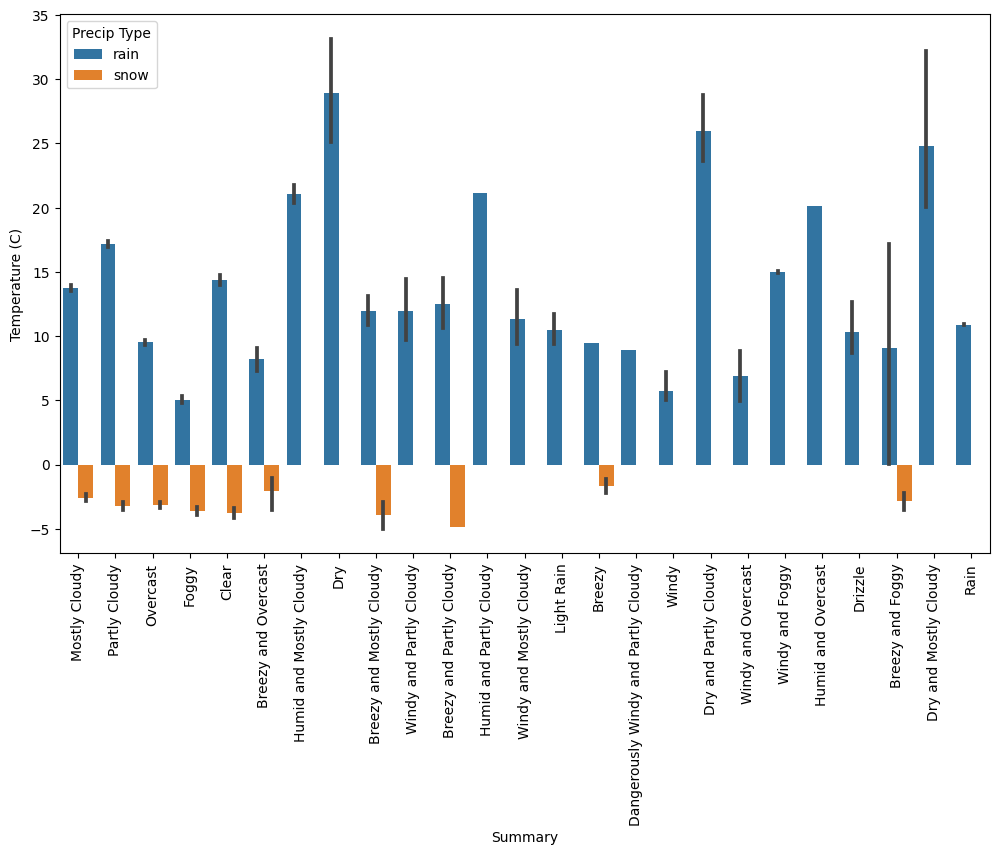

In [30]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=dataset, x="Summary", y="Temperature (C)",hue="Precip Type")

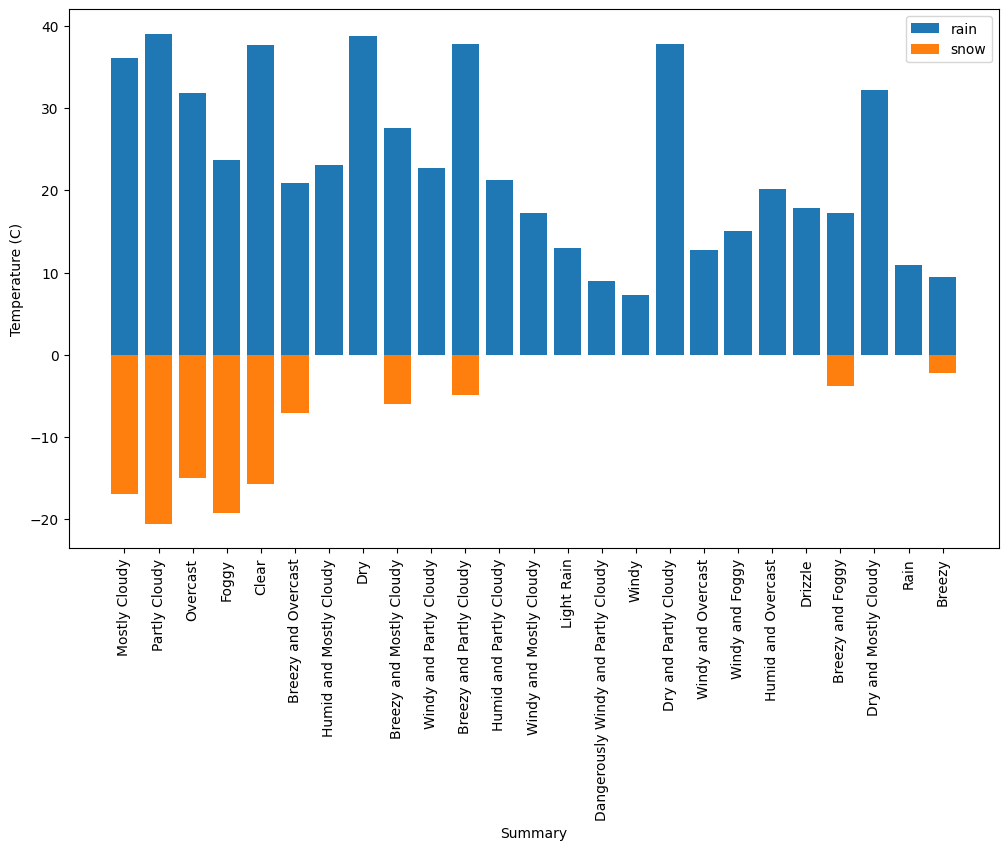

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Create the bar plot
for precip_type, group in dataset.groupby('Precip Type'):
    ax.bar(group['Summary'], group['Temperature (C)'], label=precip_type)

# Add a legend
ax.legend()

# Set the axis labels
ax.set_xlabel('Summary')
ax.set_ylabel('Temperature (C)')

# Show the plot
plt.show()

<Axes: xlabel='Summary', ylabel='Pressure (millibars)'>

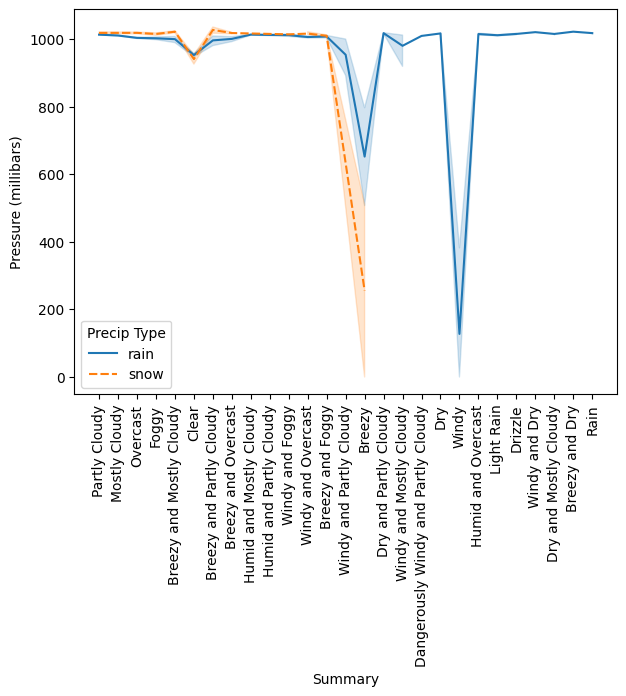

In [21]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.lineplot(data=dataset, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


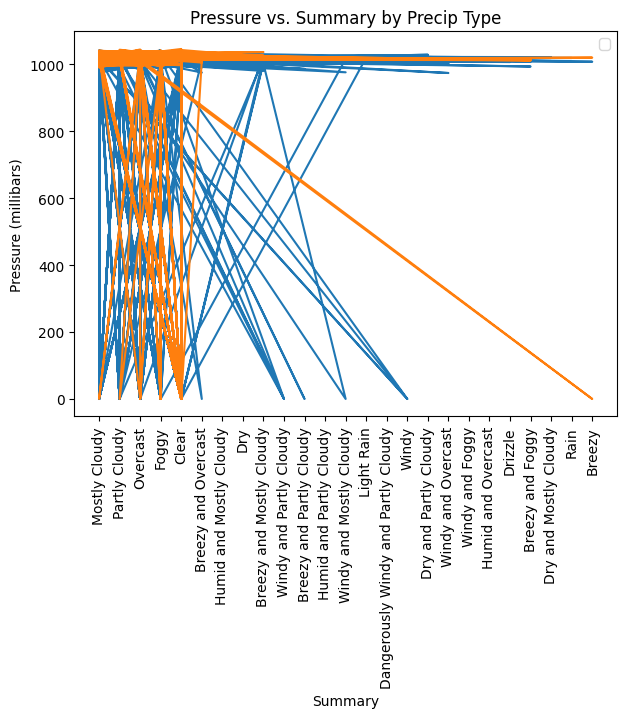

In [34]:
# Create a new figure and set the size
fig, ax = plt.subplots(figsize=(7,5))

# Set the x-axis labels to rotate 90 degrees
plt.xticks(rotation=90)

# Iterate over each unique value in the "Precip Type" column
for precip_type in dataset["Precip Type"].unique():
    # Create a subset of the DataFrame that only includes the current "Precip Type" value
    subset = dataset[dataset["Precip Type"] == precip_type]
    # Create a line plot for the "Summary" column against the "Pressure (millibars)" column
    # using the current "Precip Type" value as the label and style
    ax.plot(subset["Summary"], subset["Pressure (millibars)"], label=precip_type, linestyle='-', marker='o', markersize=5, linewidth=1)

# Set the title and axis labels
ax.set_title("Pressure vs. Summary by Precip Type")
ax.set_xlabel("Summary")
ax.set_ylabel("Pressure (millibars)")

# Add a legend
ax.legend()

# Show the plot
plt.show()

(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, -30.0, '−30'),
  Text(0, -20.0, '−20'),
  Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50')])

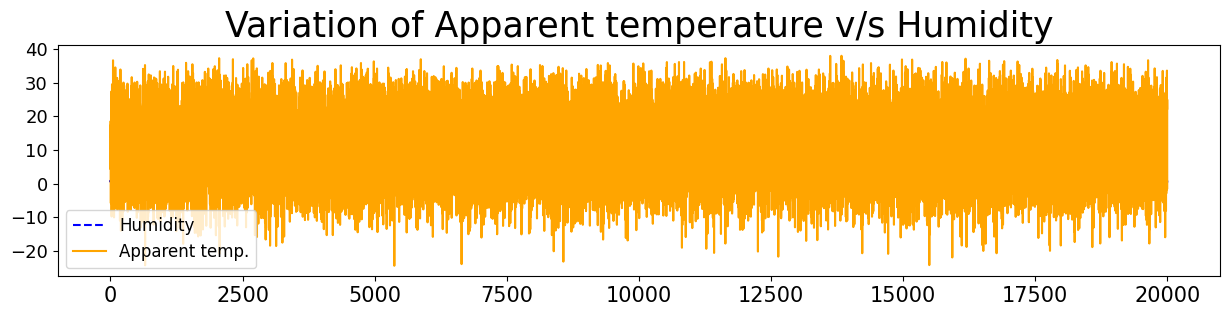

In [35]:
plt.figure(figsize=(15,3))
plt.plot(dataset['Humidity'], label = 'Humidity', color ='blue',linestyle='dashed')
plt.plot(dataset['Apparent Temperature (C)'], label = 'Apparent temp.', color  = 'orange')
plt.title('Variation of Apparent temperature v/s Humidity', fontsize = 25)
plt.legend(loc=0, fontsize =12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=13)

(array([-40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, -40.0, '−40'),
  Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80')])

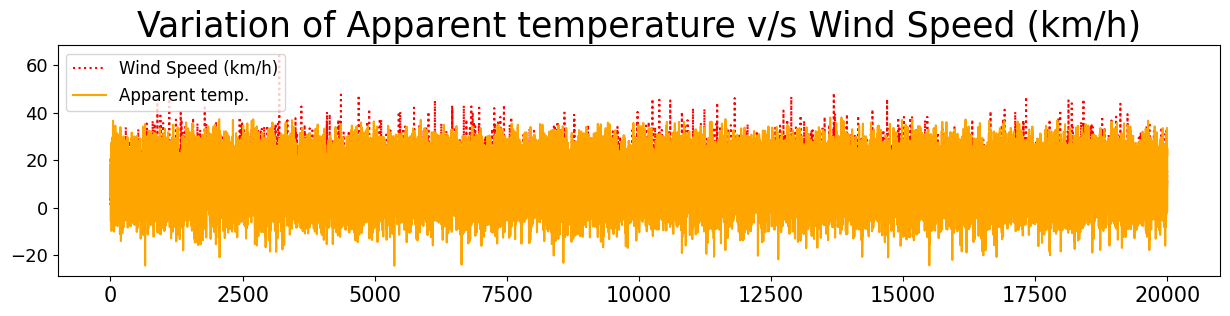

In [36]:
plt.figure(figsize=(15,3))
plt.plot(dataset['Wind Speed (km/h)'], label = 'Wind Speed (km/h)', color ='red',linestyle='dotted')
plt.plot(dataset['Apparent Temperature (C)'], label = 'Apparent temp.', color  = 'orange')
plt.title('Variation of Apparent temperature v/s Wind Speed (km/h)', fontsize = 25)
plt.legend(loc=0, fontsize =12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=13)

In [38]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2015-02-21 17:00:00+00:00,Mostly Cloudy,rain,7.222222,4.444444,0.55,15.4399,161.0,7.4865,0.0,1010.33,Mostly cloudy starting overnight.
1,2006-08-06 19:00:00+00:00,Partly Cloudy,rain,17.244444,17.244444,0.87,1.4168,33.0,9.9820,0.0,1010.18,Partly cloudy starting in the morning.
2,2010-11-19 11:00:00+00:00,Mostly Cloudy,rain,14.744444,14.744444,0.78,21.0266,140.0,9.9015,0.0,1016.77,Foggy until morning.
3,2014-05-08 01:00:00+00:00,Overcast,rain,13.794444,13.794444,0.81,10.8192,233.0,15.8263,0.0,1015.36,Mostly cloudy until evening.
4,2008-08-30 19:00:00+00:00,Partly Cloudy,rain,18.566667,18.566667,0.45,16.6796,90.0,9.9820,0.0,1019.75,Partly cloudy until night.


In [40]:
dataset['Formatted Date'][0].month

2

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

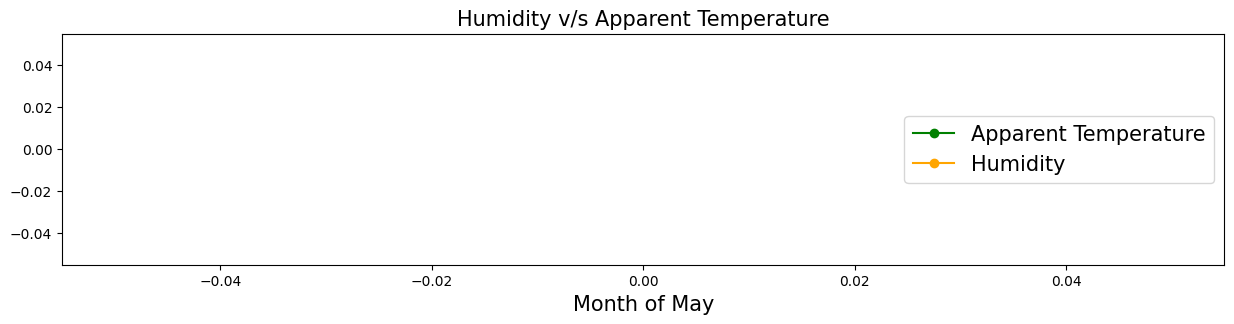

In [43]:
may =  dataset[dataset['Formatted Date'].dt.month == 5]
plt.figure(figsize=(15,3))

# plt.plot(may.loc['2006-05-01':'2016-05-01','Apparent Temperature (C)'],marker='o', label = 'Apparent Temperature', color ='green',linestyle='-')
# plt.plot(may.loc['2006-05-01':'2016-05-01','Humidity'], marker='o',label = 'Humidity', color  = 'orange')

plt.plot(may.loc['2015-05-01':'2016-05-31', 'Apparent Temperature (C)'], marker='o', label='Apparent Temperature', color='green', linestyle='-')
plt.plot(may.loc['2015-05-01':'2016-05-31', 'Humidity'], marker='o', label='Humidity', color='orange')

plt.legend(loc='center right', fontsize =15)
plt.xlabel('Month of May',fontsize = 15)
plt.title('Humidity v/s Apparent Temperature', fontsize = 15)

C:\Users\Hammad\AppData\Local\Temp\ipykernel_21152\2649714641.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'))


<Axes: >

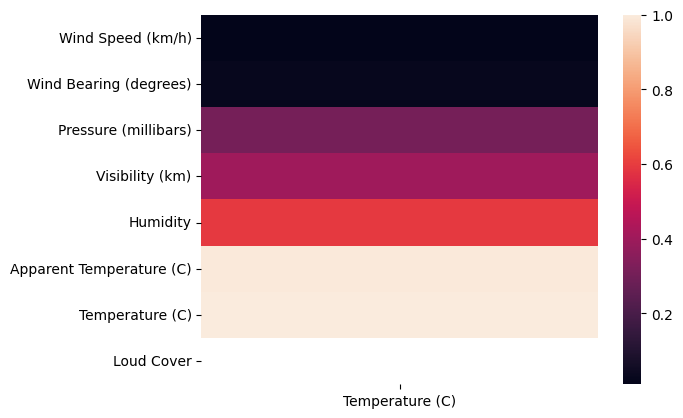

In [45]:
import seaborn as sns
sns.heatmap(dataset.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'))

C:\Users\Hammad\AppData\Local\Temp\ipykernel_21152\2899361039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr('spearman').abs()[['Temperature (C)']]


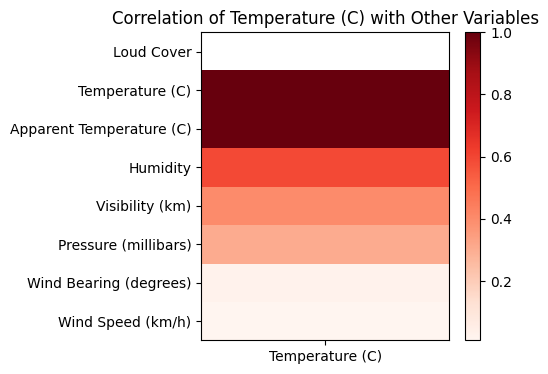

In [48]:
# Compute the correlation matrix using Spearman's rank correlation coefficient
corr = dataset.corr('spearman').abs()[['Temperature (C)']]

# Sort the correlation matrix by Temperature (C)
corr = corr.sort_values('Temperature (C)')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(4, 4))

# Create a heatmap using Matplotlib's pcolor function
heatmap = ax.pcolor(corr.values, cmap=plt.cm.Reds)

# Set the tick labels
yticks = np.arange(0.5, len(corr.index), 1)
ax.set_yticks(yticks)
ax.set_yticklabels(corr.index)

# Rotate the y-axis labels
plt.yticks(rotation=0)

# Set the tick labels for the x-axis
ax.set_xticks([0.5])
ax.set_xticklabels(['Temperature (C)'])

# Set the colorbar
cbar = plt.colorbar(heatmap)

# Set the title
plt.title('Correlation of Temperature (C) with Other Variables')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Analysis of Weather Conditions with Temperature(C)')

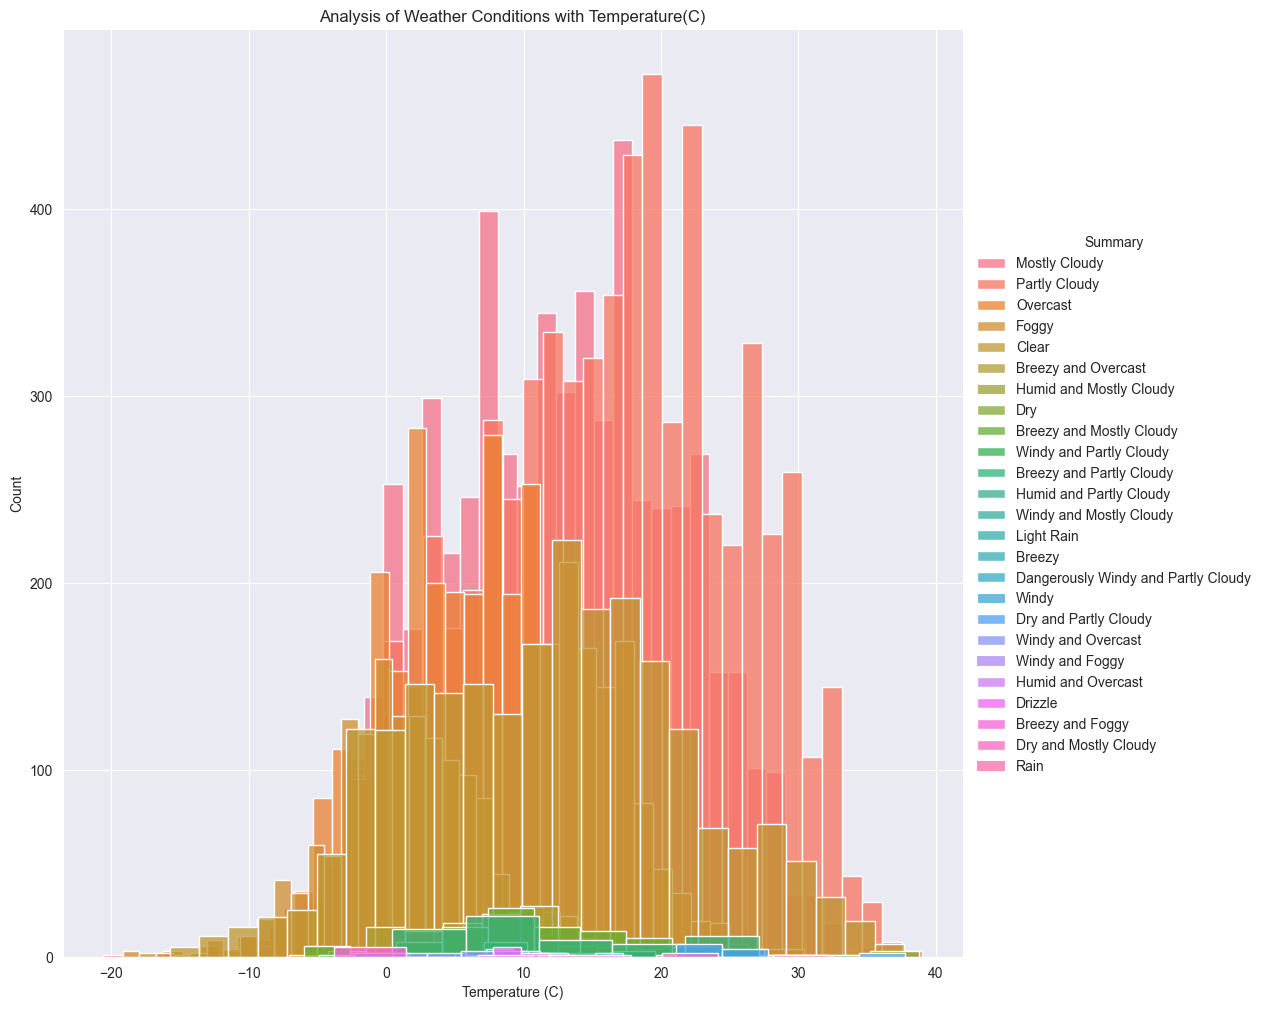

In [49]:
sns.set_style("darkgrid")
sns.FacetGrid(dataset, hue="Summary", height=10).map(sns.histplot, "Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Temperature(C)")

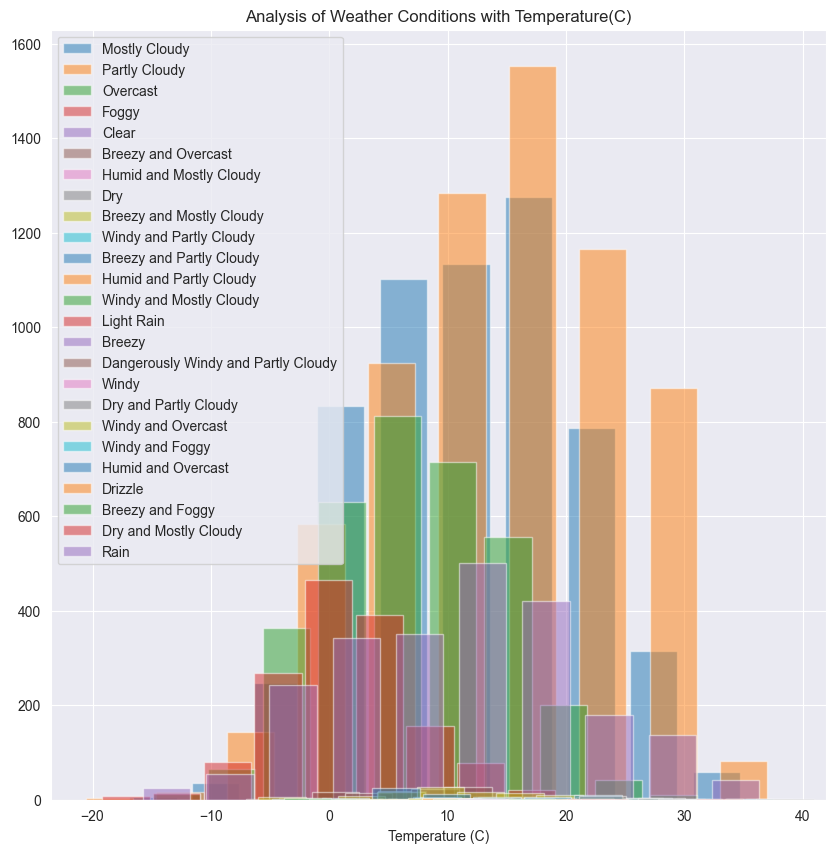

In [55]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))

# Create a histogram for each value of 'Summary' with thinner bars
for summary in dataset['Summary'].unique():
    subset = dataset[dataset['Summary'] == summary]
    ax.hist(subset['Temperature (C)'], alpha=0.5, label=summary, width=4)

# Set the x-axis label and title
ax.set_xlabel('Temperature (C)')
ax.set_title('Analysis of Weather Conditions with Temperature(C)')

# Add a legend
ax.legend()

# Show the plot
plt.show()

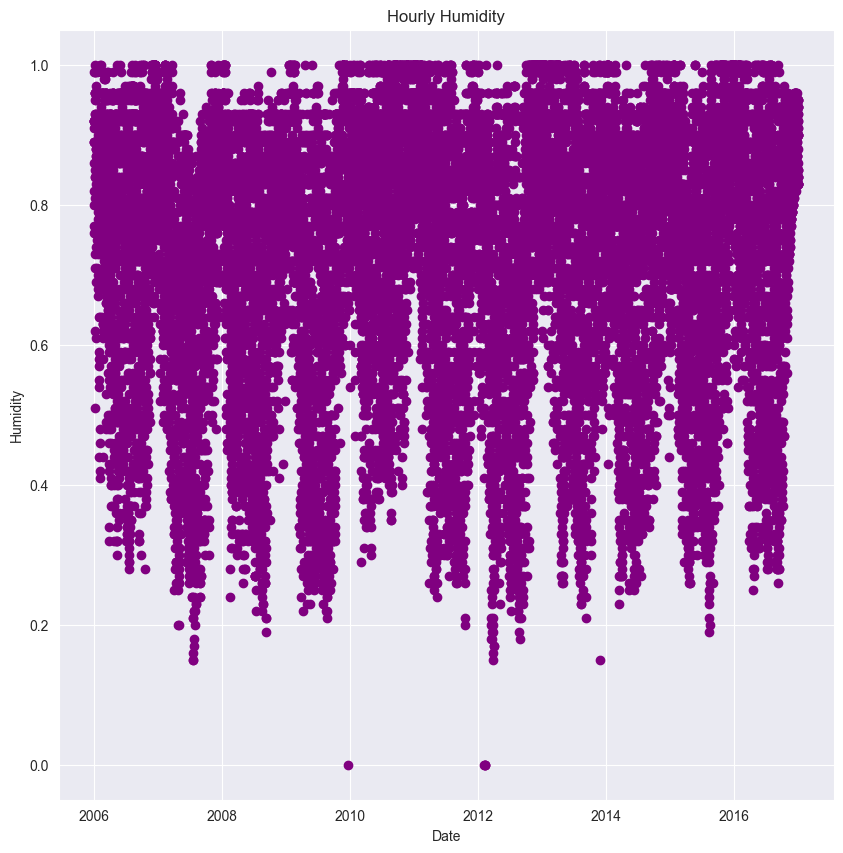

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(dataset['Formatted Date'],
          dataset['Humidity'],
          color='purple')
ax.set(xlabel='Date',ylabel='Humidity',title='Hourly Humidity')
plt.show()

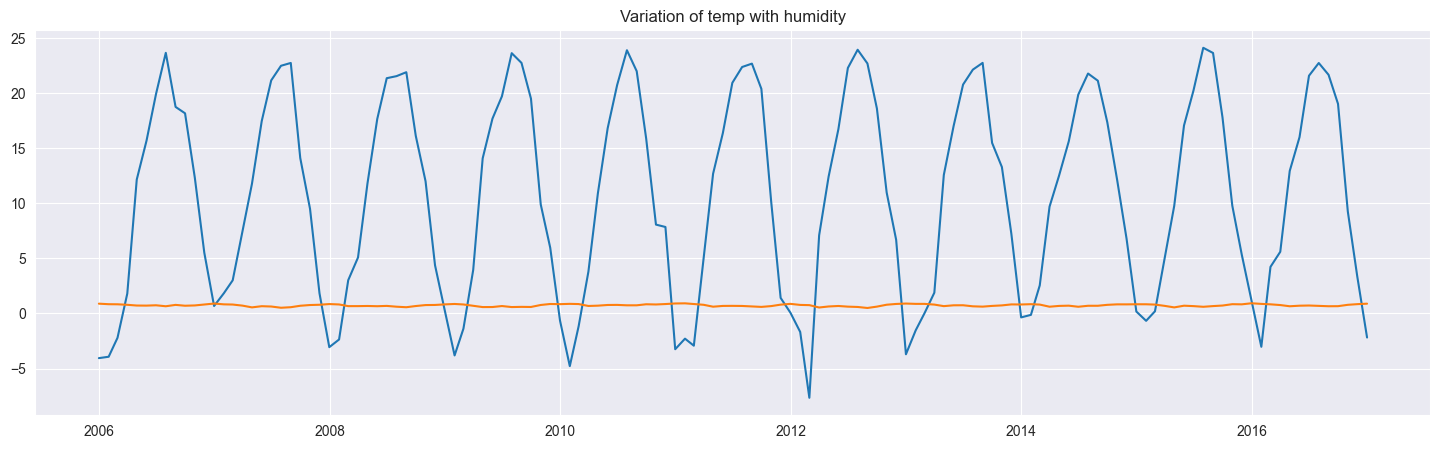

In [61]:
data = dataset[['Apparent Temperature (C)','Humidity','Formatted Date']].copy()
data = data.set_index('Formatted Date')
data = data.resample('M').mean()

plt.figure(figsize=(18,5))
plt.title('Variation of temp with humidity')
plt.plot(data)

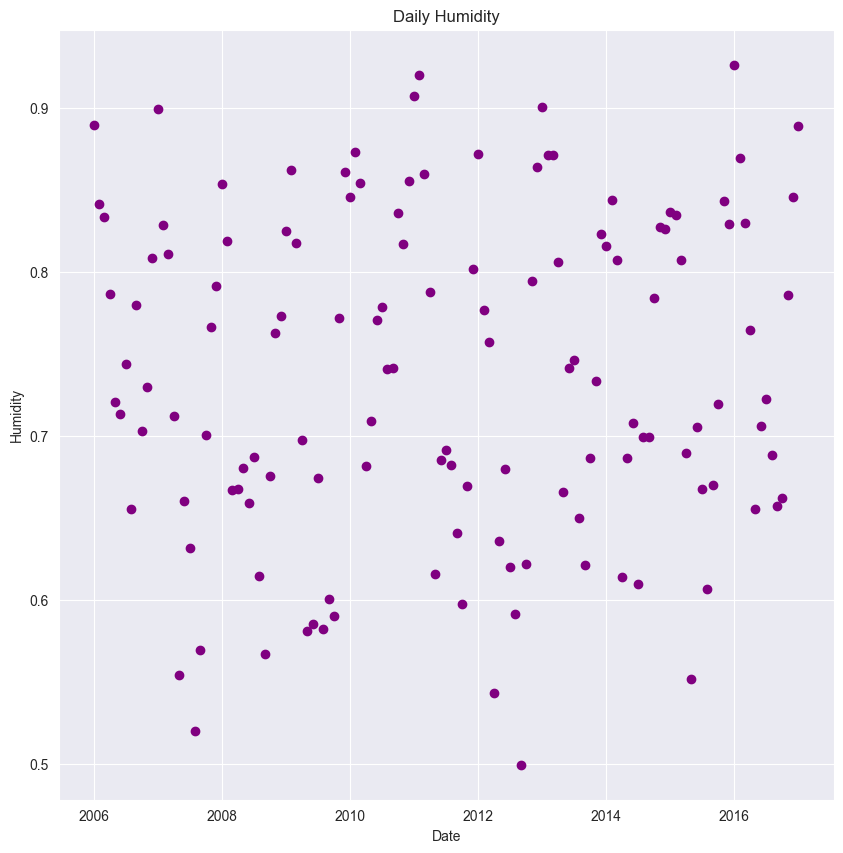

In [62]:
weather_daily = data.resample('D').aggregate('mean')
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(weather_daily.index.values,
          weather_daily['Humidity'], color='purple')
ax.set(xlabel='Date',ylabel='Humidity',title='Daily Humidity')
plt.show()

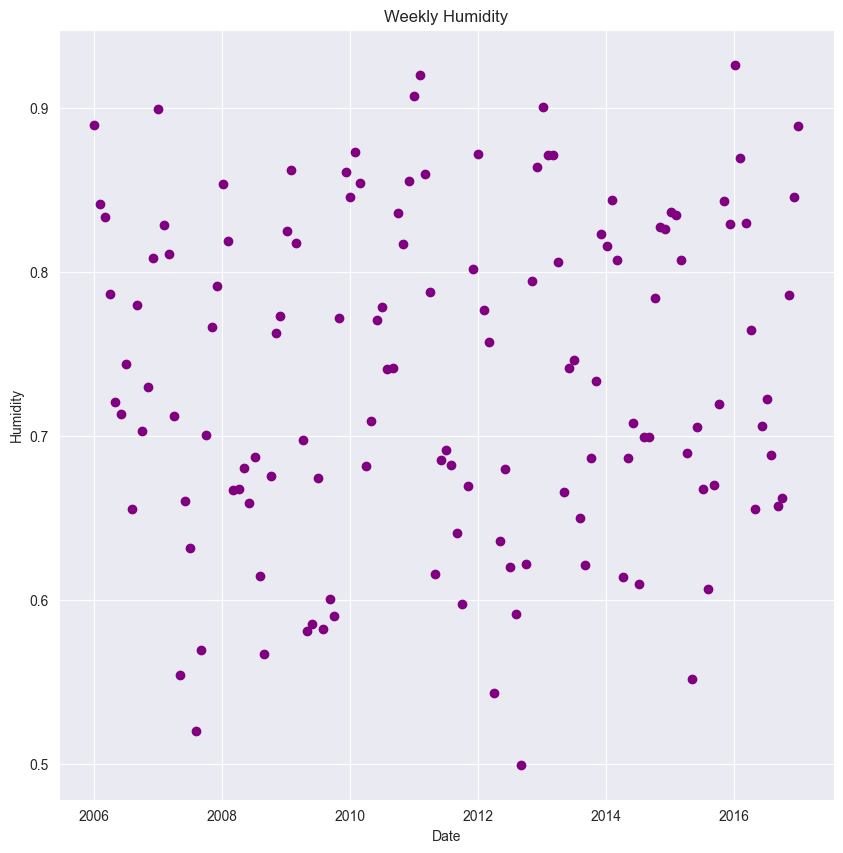

In [63]:
weather_weekly = data.resample('W').aggregate('mean')
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(weather_weekly.index.values,
          weather_weekly['Humidity'], color='purple')
ax.set(xlabel='Date',ylabel='Humidity',title='Weekly Humidity')
plt.show()

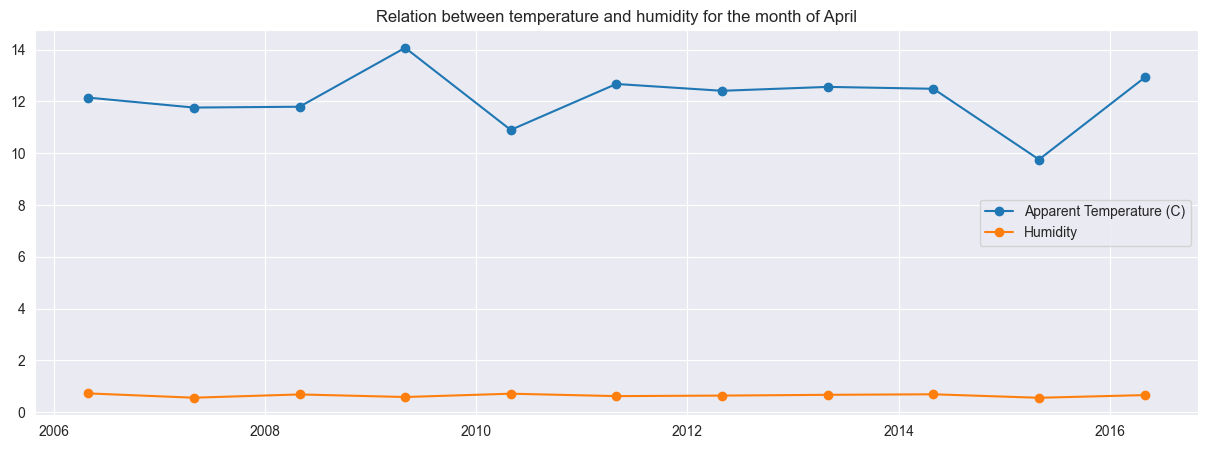

In [65]:
plt.figure(figsize=(15, 5))
data_of_april = data[data.index.month==4]
plt.plot(data_of_april, marker='o',label=['Apparent Temperature (C)','Humidity'] );
plt.legend(loc = 'center right',fontsize = 10)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

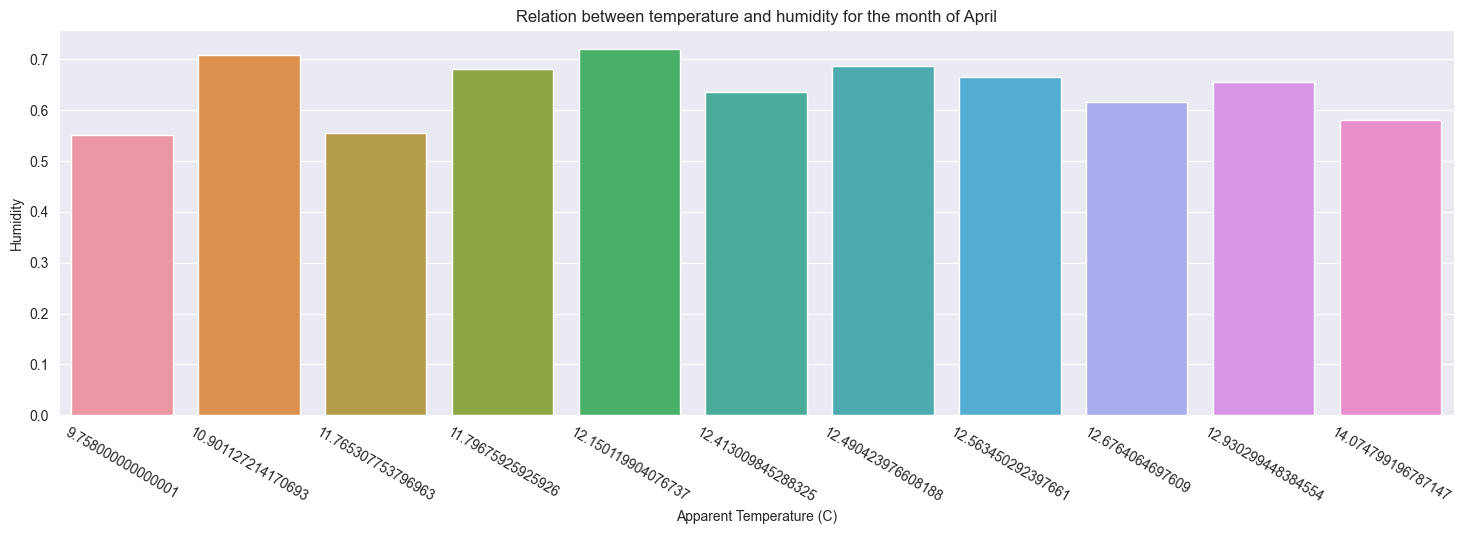

In [66]:
plt.figure(figsize = (18,5))
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=data_of_april)
plt.xticks(rotation=-30)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

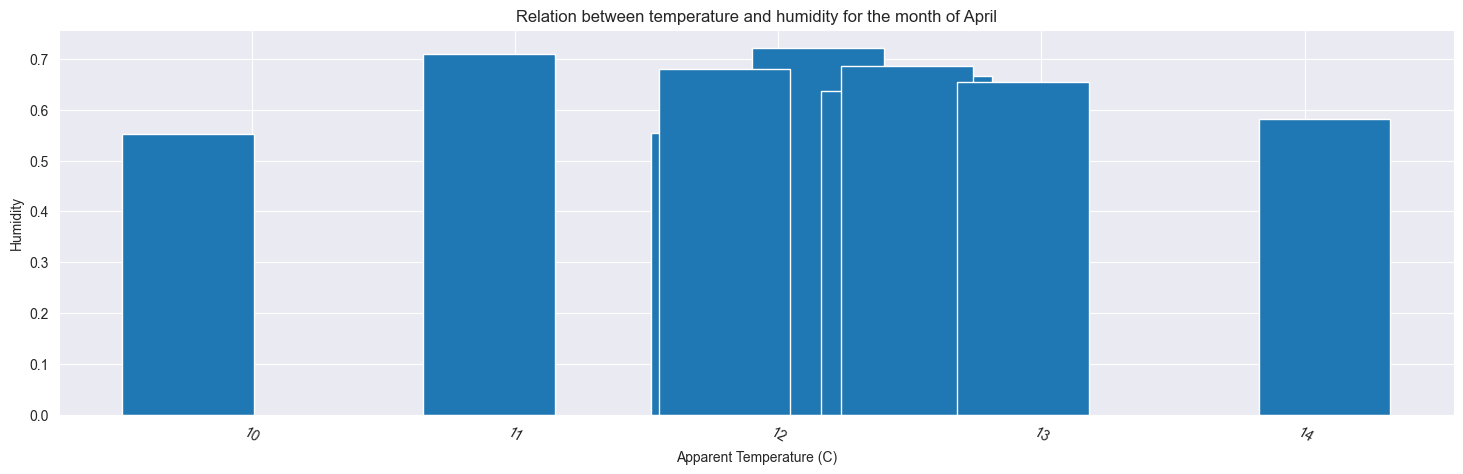

In [69]:
# Set figure size
plt.figure(figsize = (18,5))

data_of_april = data[data.index.month==4]

# Create barplot
plt.bar(data_of_april['Apparent Temperature (C)'], data_of_april['Humidity'], width=0.5)

# Rotate x-axis labels
plt.xticks(rotation=-30)

# Add title and axis labels
plt.title('Relation between temperature and humidity for the month of April')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')

# Show the plot
plt.show()

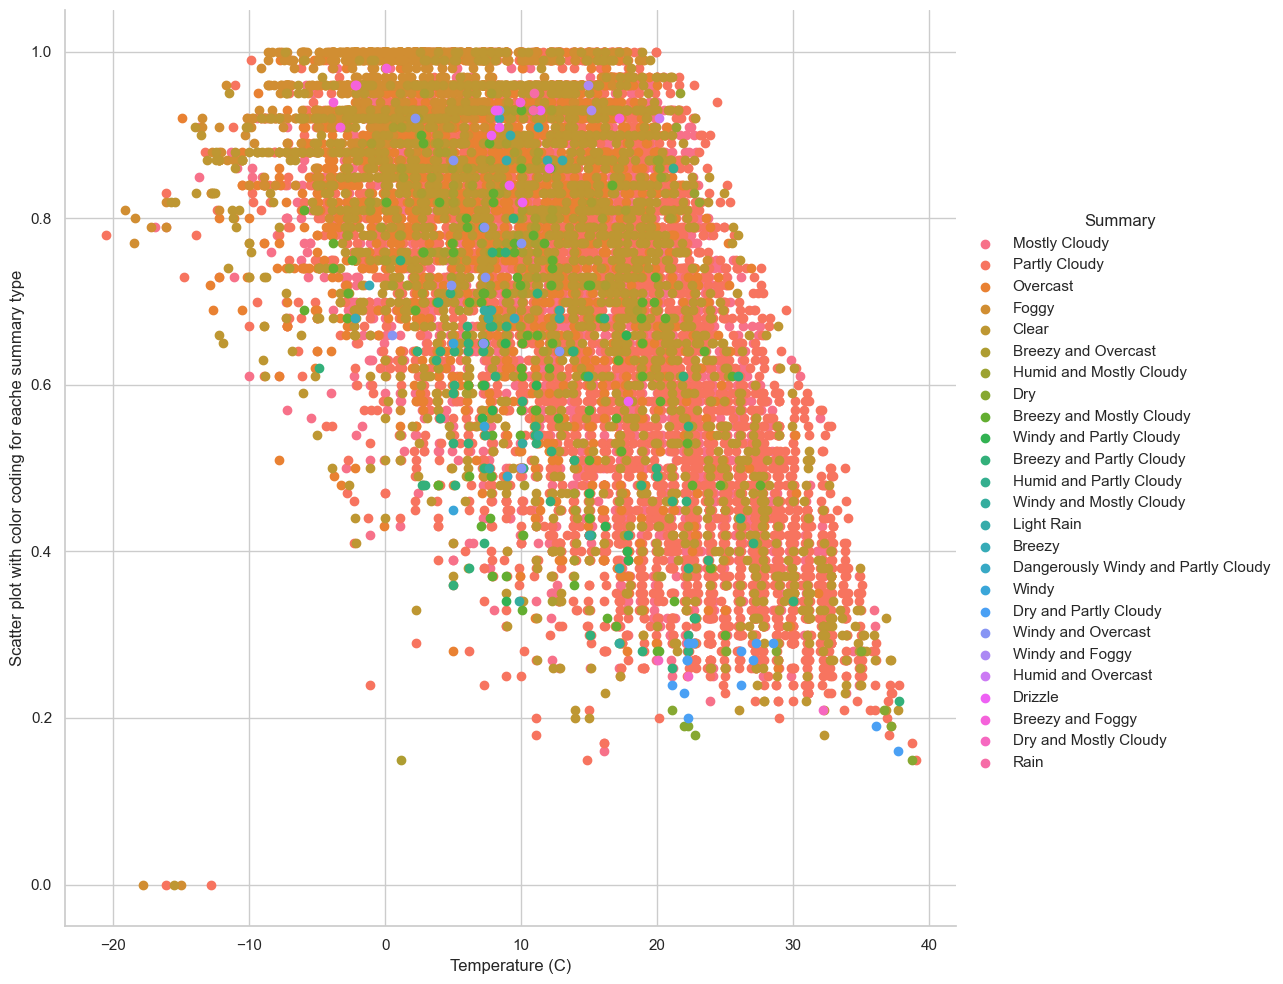

In [70]:
# Scatter plot with color coding for eache summary type
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.FacetGrid(dataset, hue="Summary", height=10).map(plt.scatter, "Temperature (C)", "Humidity").add_legend()
ax.set(ylabel="Scatter plot with color coding for eache summary type")

C:\Users\Hammad\AppData\Local\Temp\ipykernel_21152\1342605547.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-30)
C:\Users\Hammad\AppData\Local\Temp\ipykernel_21152\1342605547.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'), ax=ax4)


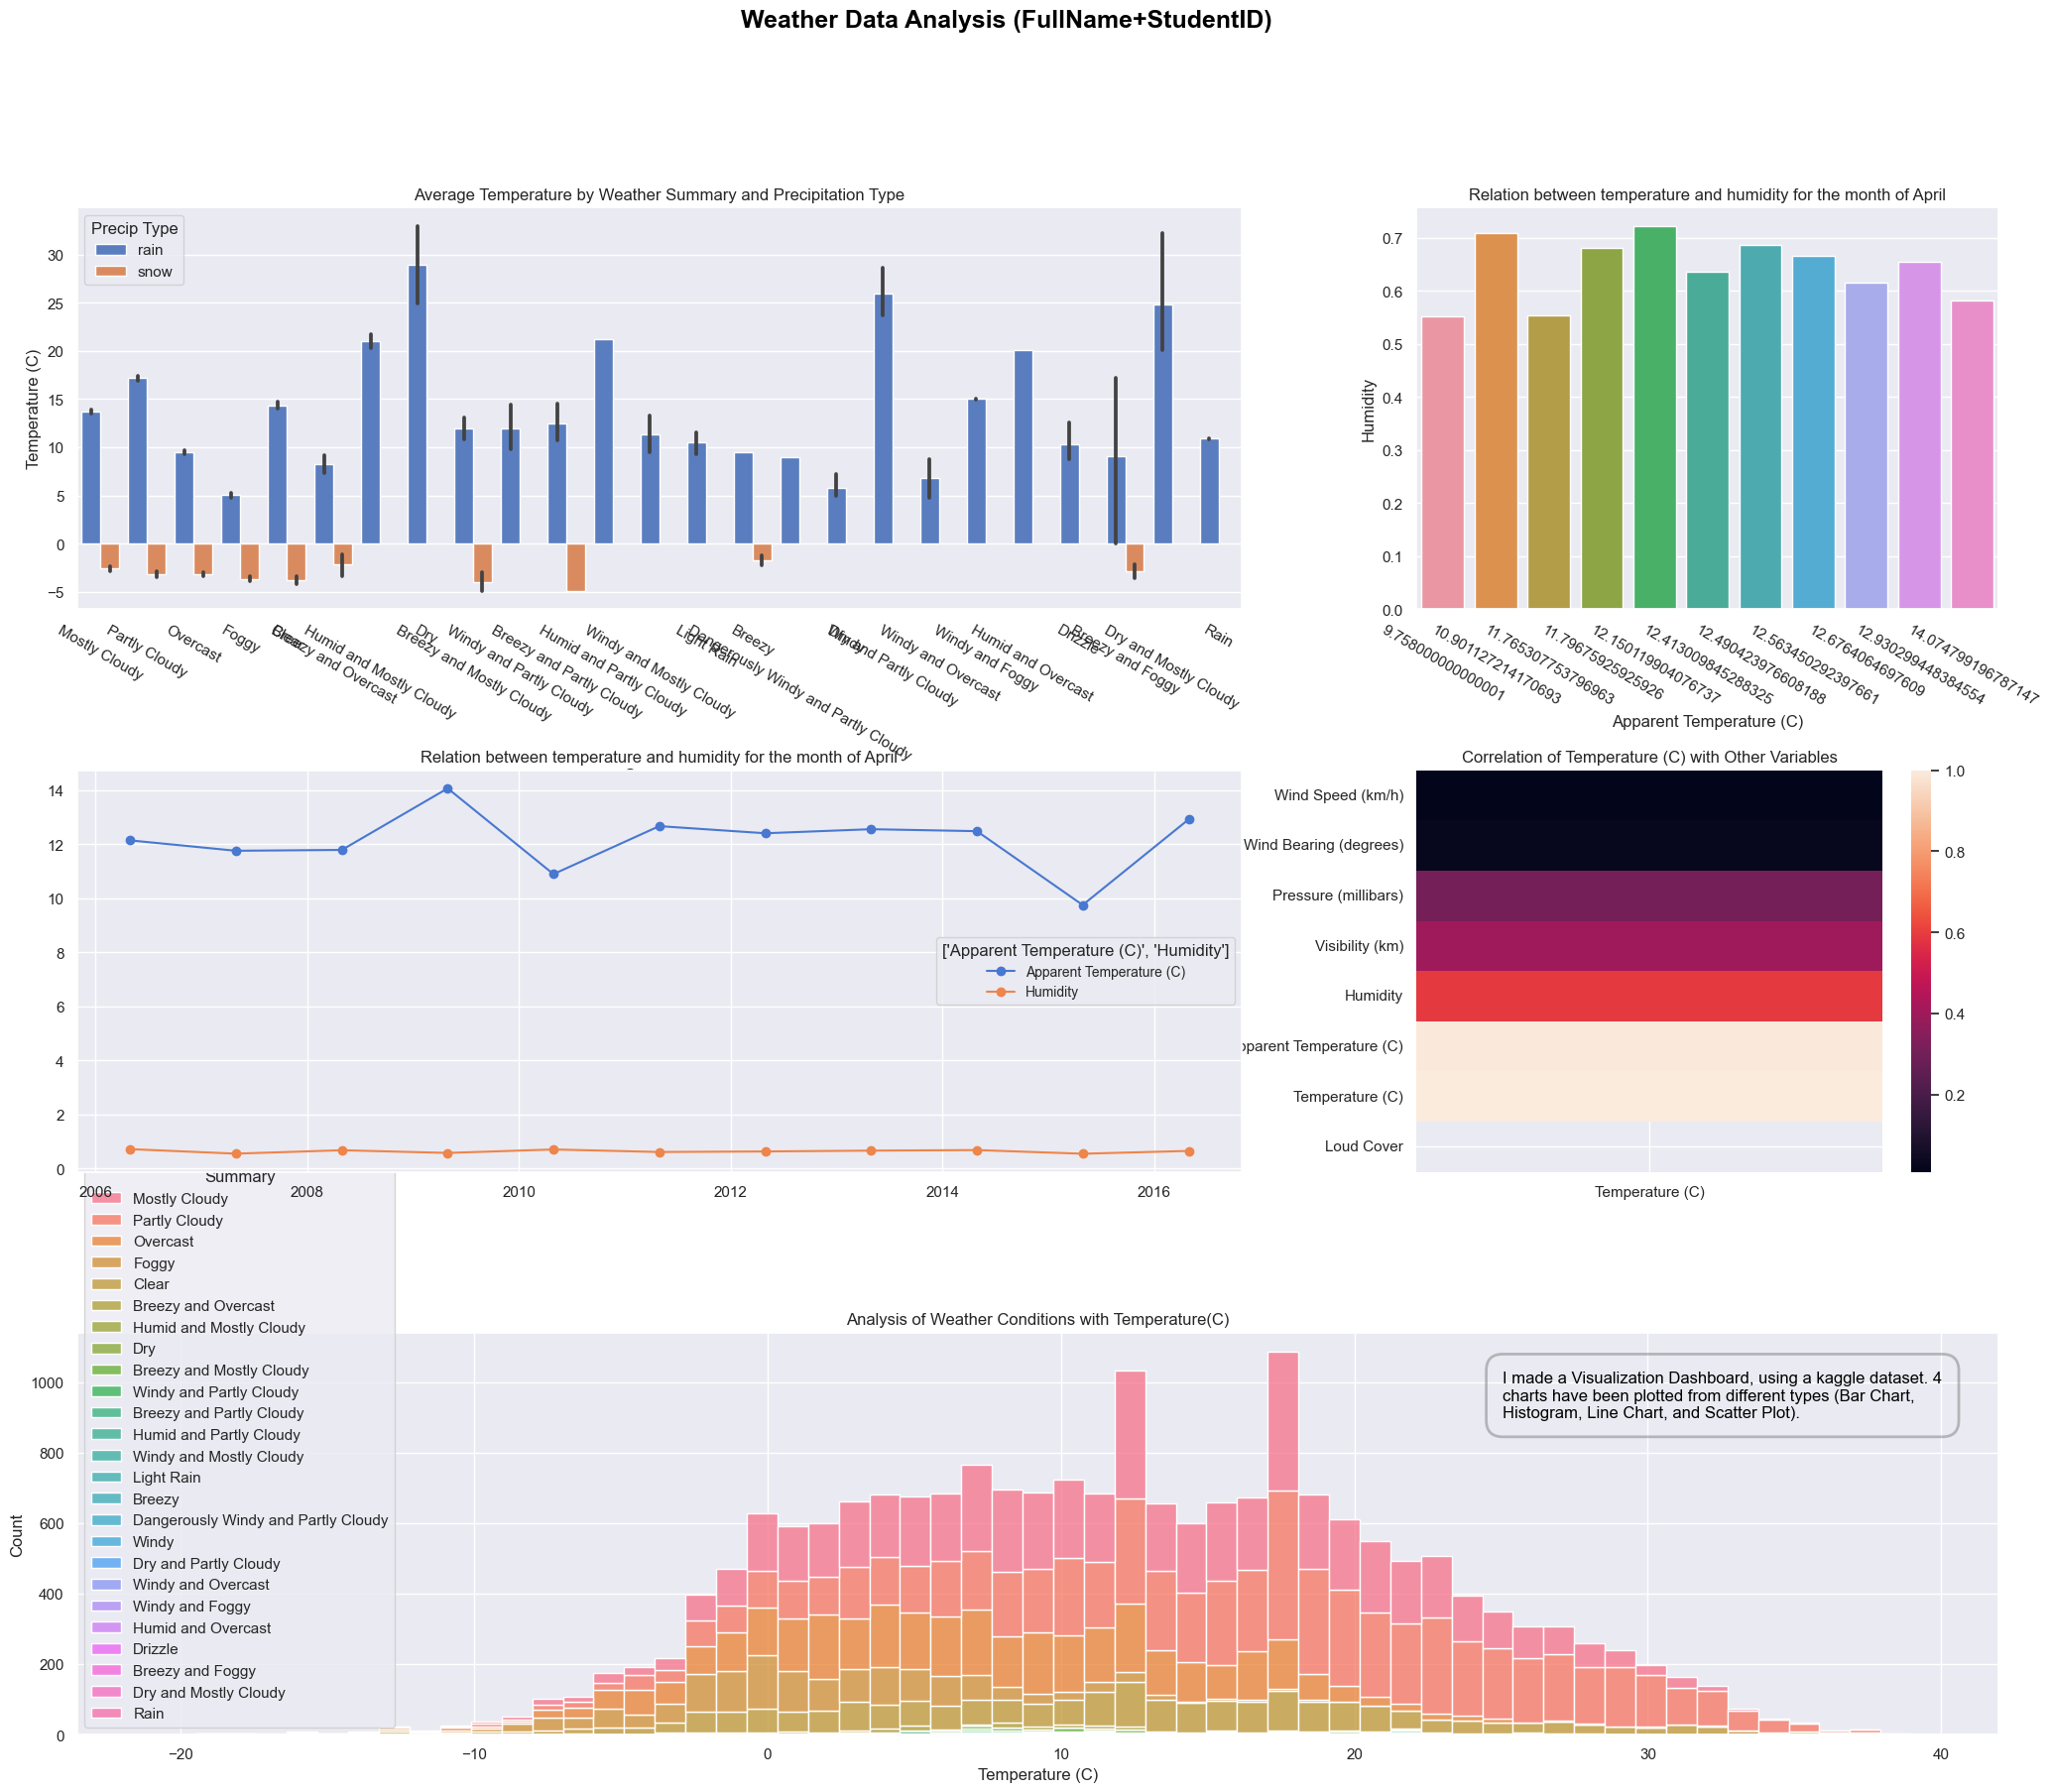

In [112]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Create a 3x2 grid of subplots
fig = plt.figure(figsize=(25, 20))
gs = gridspec.GridSpec(ncols=2, nrows=3, width_ratios=[2, 1])

# Add the first plot to the first row and first column
ax1 = fig.add_subplot(gs[0, 0])
# sns.set_theme(style="whitegrid", palette="muted")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-30)
sns.barplot(data=dataset, x="Summary", y="Temperature (C)",hue="Precip Type", ax=ax1)
ax1.set_title("Average Temperature by Weather Summary and Precipitation Type")

data = dataset[['Apparent Temperature (C)','Humidity','Formatted Date']].copy()
data = data.set_index('Formatted Date')
data = data.resample('M').mean()
data_of_april = data[data.index.month==4]

ax2 = fig.add_subplot(gs[0, 1])
# data_of_april = dataset[dataset['Formatted Date'].dt.month == 4]
sns.barplot(data=data_of_april, x='Apparent Temperature (C)', y='Humidity', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-30)
ax2.set_title('Relation between temperature and humidity for the month of April')

# Add the third plot to the second row and both columns
ax3 = fig.add_subplot(gs[2:, :])
# sns.set_style("darkgrid")
sns.histplot(data=dataset, x="Temperature (C)", hue="Summary", multiple="stack", ax=ax3)
ax3.set_title("Analysis of Weather Conditions with Temperature(C)")

ax4 = fig.add_subplot(gs[1,1])
sns.heatmap(dataset.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'), ax=ax4)
ax4.set_title("Correlation of Temperature (C) with Other Variables")

ax5 = fig.add_subplot(gs[1,0])
ax5.plot(data_of_april, marker='o',label=['Apparent Temperature (C)','Humidity'])
ax5.legend(title=['Apparent Temperature (C)','Humidity'], loc = 'center right',fontsize = 10)
ax5.set_title('Relation between temperature and humidity for the month of April')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)


text = 'I made a Visualization Dashboard, using a kaggle dataset. 4 charts have been plotted from different types (Bar Chart,\
    Histogram, Line Chart, and Scatter Plot).'

wrapped_text = textwrap.wrap(text, width=65)

fig.text(0.7, 0.27, '\n'.join(wrapped_text), fontsize=12, bbox=dict(boxstyle='round', facecolor='none', edgecolor='grey', linewidth=2, pad=1, alpha=0.5), color='Black')

fig.suptitle("Weather Data Analysis (FullName+StudentID)", fontsize=18, fontweight='bold', color='Black')
plt.savefig('StudentID.PNG', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


C:\Users\Hammad\AppData\Local\Temp\ipykernel_21152\3877428463.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'), ax=ax4)


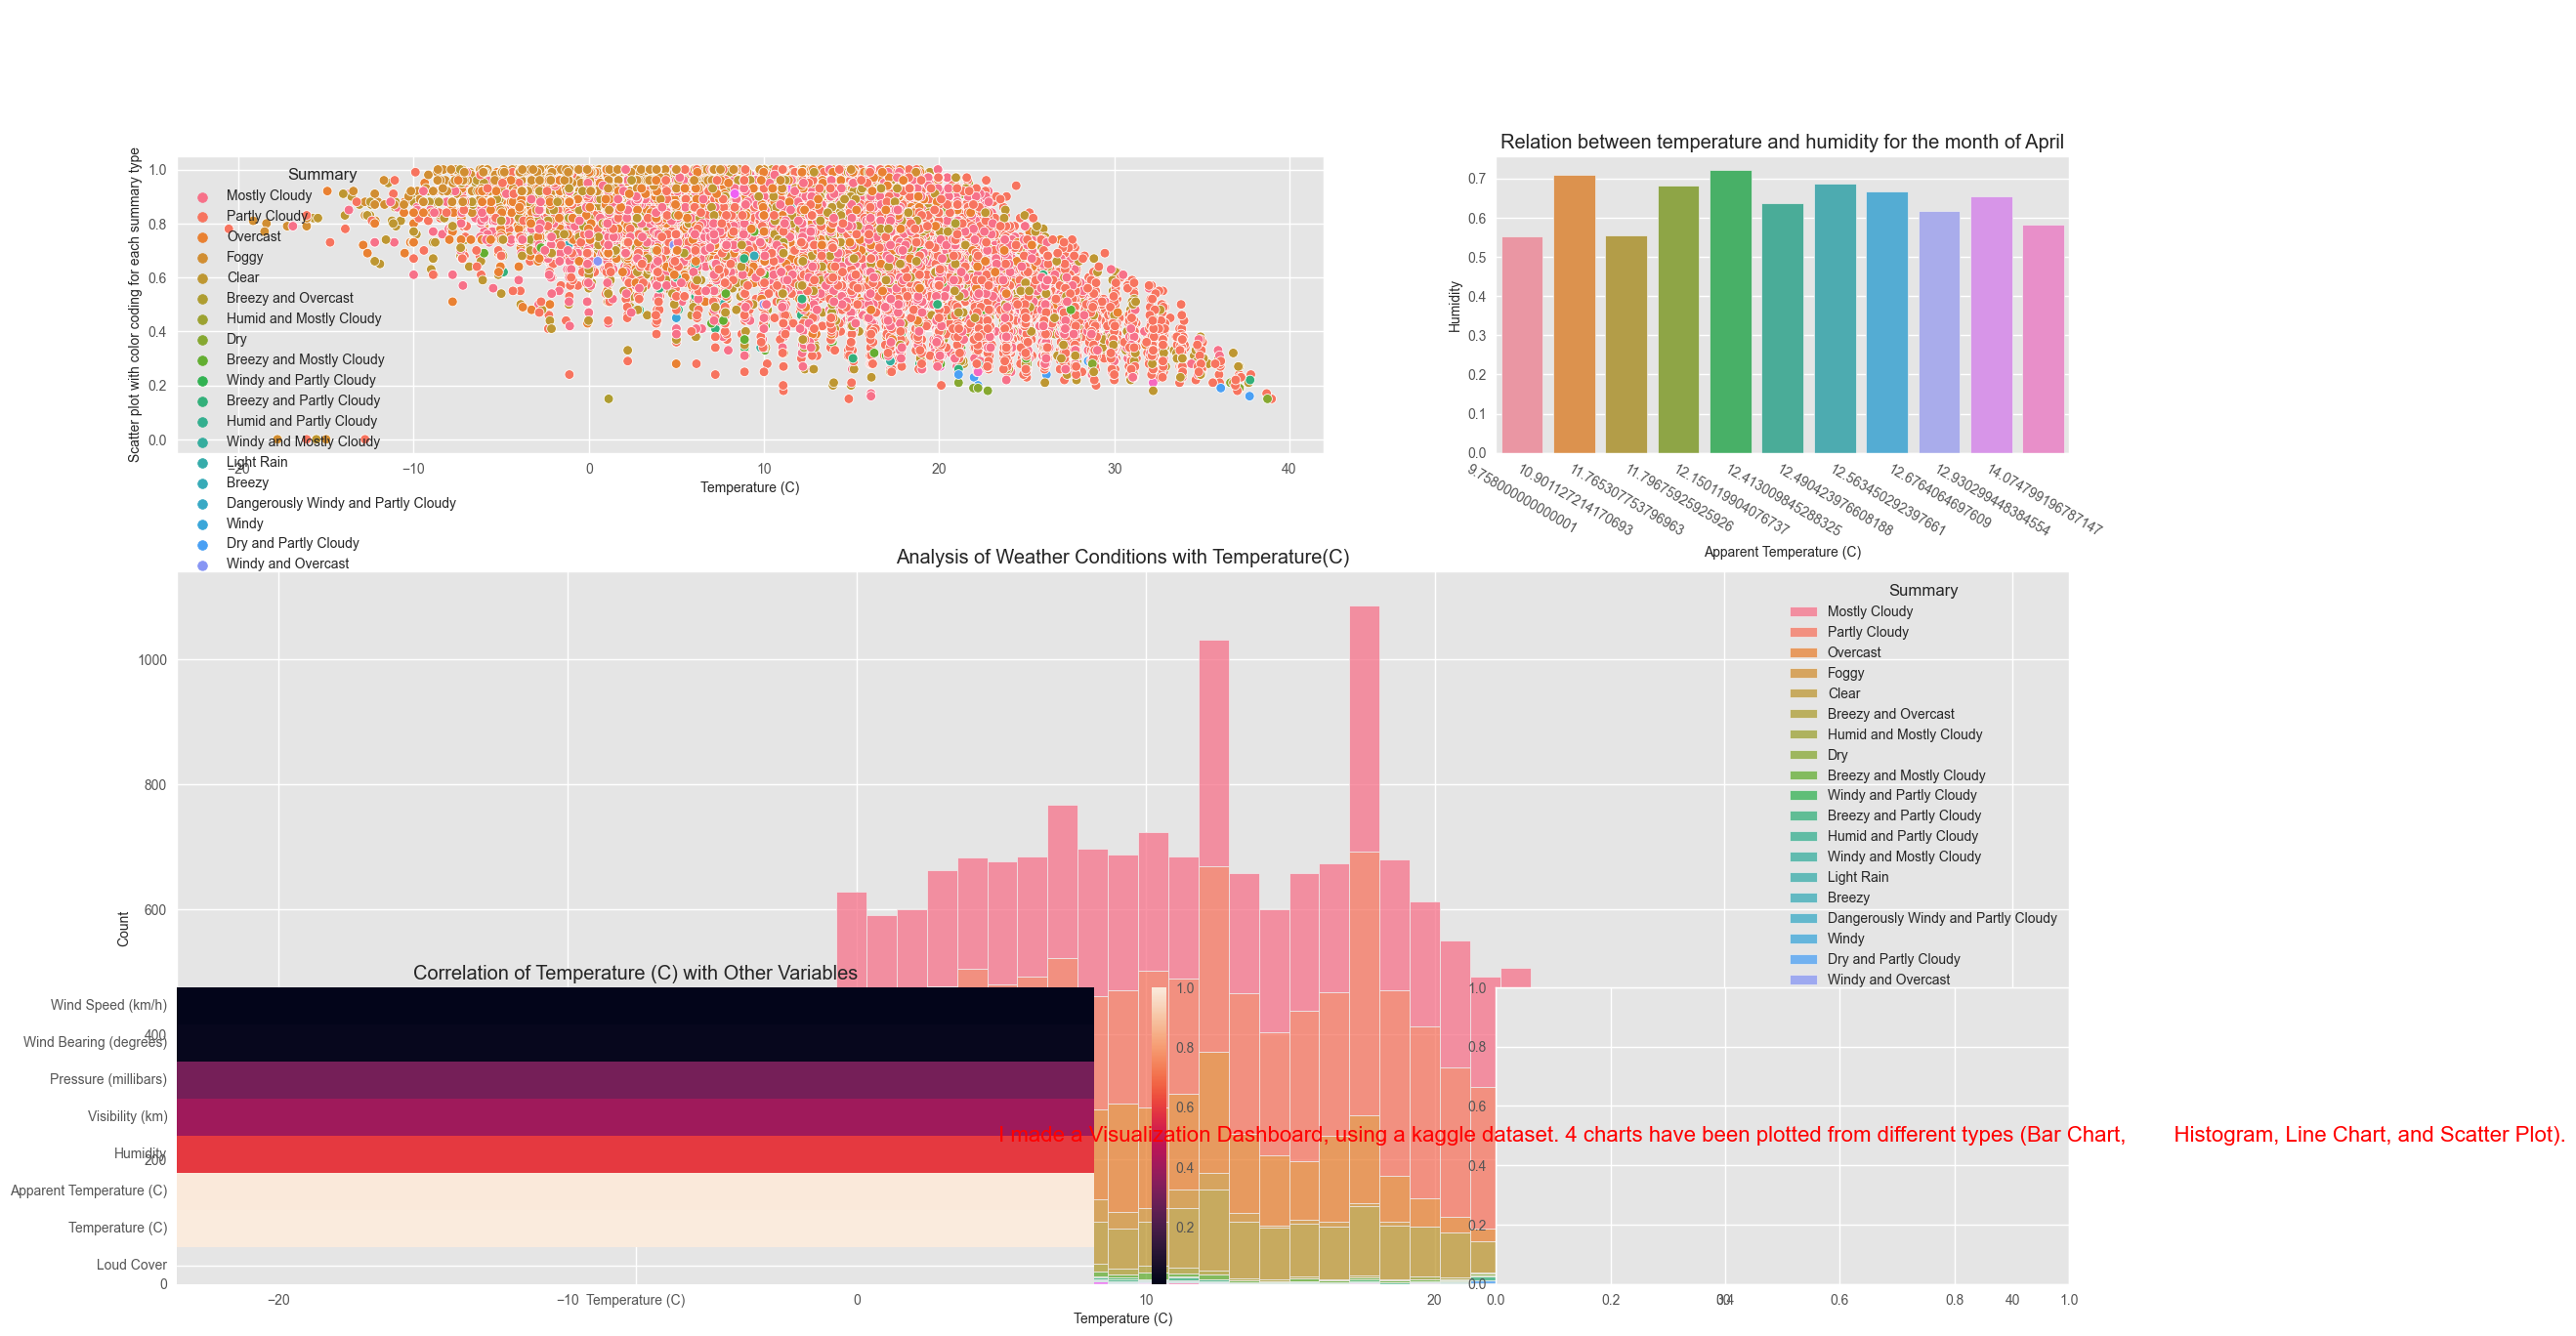

In [96]:
with plt.style.context(("seaborn","ggplot")):
    # Create a 3x2 grid of subplots
    fig = plt.figure(figsize=(25, 15))
    gs = gridspec.GridSpec(ncols=2, nrows=3, width_ratios=[2, 1])

    # Add the first plot to the first row and first column
    ax1 = fig.add_subplot(gs[0, 0])
    # sns.set_theme(style="whitegrid", palette="muted")
    sns.scatterplot(data=dataset, x="Temperature (C)", y="Humidity", hue="Summary", ax=ax1)
    ax1.set_ylabel("Scatter plot with color coding for each summary type")

    data = dataset[['Apparent Temperature (C)','Humidity','Formatted Date']].copy()
    data = data.set_index('Formatted Date')
    data = data.resample('M').mean()
    data_of_april = data[data.index.month==4]

    ax2 = fig.add_subplot(gs[0, 1])
    # data_of_april = dataset[dataset['Formatted Date'].dt.month == 4]
    sns.barplot(data=data_of_april, x='Apparent Temperature (C)', y='Humidity', ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-30)
    ax2.set_title('Relation between temperature and humidity for the month of April')

    # Add the third plot to the second row and both columns
    ax3 = fig.add_subplot(gs[1:, :])
    # sns.set_style("darkgrid")
    sns.histplot(data=dataset, x="Temperature (C)", hue="Summary", multiple="stack", ax=ax3)
    ax3.set_title("Analysis of Weather Conditions with Temperature(C)")

    ax4 = fig.add_subplot(gs[2,0])
    sns.heatmap(dataset.corr('spearman').abs()[['Temperature (C)']].sort_values('Temperature (C)'), ax=ax4)
    ax4.set_title("Correlation of Temperature (C) with Other Variables")

    ax5 = fig.add_subplot(gs[2,1])
    text = 'I made a Visualization Dashboard, using a kaggle dataset. 4 charts have been plotted from different types (Bar Chart,\
        Histogram, Line Chart, and Scatter Plot).'
    ax5.text(0.5, 0.5, text, ha='center', va='center', fontsize=16, color='red')


    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4)


    # wrapped_text = textwrap.wrap(text, width=10)

    # fig.text(0.92, 0.1, '\n'.join(wrapped_text), fontsize=12, bbox=dict(boxstyle='round', facecolor='none', edgecolor='grey', linewidth=2, pad=1, alpha=0.5), color='white')

    fig.suptitle("Weather Data Analysis (FullName+StudentID)", fontsize=14, fontweight='bold', color='white')
    plt.savefig('StudentID.PNG', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import textwrap

data = "https://www.kaggle.com/datasets/muthuj7/weather-dataset?resource=download&select=weatherHistory.csv"

def create_figure():
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,12))

        specs = gridspec.GridSpec(ncols=2, nrows=3, figure=fig, width_ratios=[1, 2]) ## Declaring 3x2 figure.
        specs.update(wspace=0.5, hspace=1)

        ax1 = fig.add_subplot(specs[0, 0]) ## First Row First Column
        ax2 = fig.add_subplot(specs[0, 1]) ## First Row Second Colums
        ax3 = fig.add_subplot(specs[1, :]) ## Second Row 
        ax4 = fig.add_subplot(specs[2, :]) ## Thirt Row 

        ## First Graph -  Bar Chart
        data['Institution Type'].value_counts().plot(ax=ax1, kind='bar', color ='royalblue', width = 0.3)
        # for s in ['top', 'bottom', 'left', 'right']:
        for s in ['top', 'right']:
            ax1.spines[s].set_visible(False)
        
        # # Remove x, y Ticks
        ax1.xaxis.set_ticks_position('none')
        ax1.yaxis.set_ticks_position('none')
        
        # Add padding between axes and labels
        ax1.xaxis.set_tick_params(pad = 2)
        ax1.yaxis.set_tick_params(pad = 5)

        #  fig color
        fig.set_facecolor("black")

        # using set_facecolor() method
        ax1.set_facecolor("black")

        ax1.spines['bottom'].set_color('white')  # set color of x-axis
        ax1.spines['left'].set_color('white')   # set color of y-axis

        ax1.tick_params(axis='x', labelcolor='white')  # set color of x-axis values
        ax1.tick_params(axis='y', labelcolor='white') # set color of y-axis values

        # Add x, y gridlines
        ax1.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)

        ax1.set_xlabel("Institution Type",  labelpad=10, color="red")
        ax1.set_ylabel("Frequency", labelpad=10, color="red")
        ax1.set_title("Frequency Graph of Institution Type", fontsize = 12, fontweight ='bold', color ='white', loc='center', pad = 6)

        ax1.tick_params(axis='x', rotation=0)

        ## Second Graph - Histogram + Line chart
        ax2.hist(data["Age"], density=True, color='green', alpha=0.6)

        # set custom start and end values for x-axis
        ax2.set_xlim(0, max(data['Age']) + 5)

        # compute kernel density estimate
        kde = sns.kdeplot(data['Age'], color='white', ax=ax2, linewidth=2)

        # get x and y values of the kde line
        x_kde, y_kde = kde.get_lines()[0].get_data()

        # plot a line from starting point of xlim to ending of xlim
        start, end = ax2.get_xlim()
        x_line = np.linspace(start, end, 1000)
        y_line = np.interp(x_line, x_kde, y_kde)
        ax2.plot(x_line, y_line, color='white', linewidth=2)

        # set axis text color to white
        ax2.xaxis.label.set_color('white')
        ax2.yaxis.label.set_color('white')
        ax2.tick_params(axis='x', colors='white')
        ax2.tick_params(axis='y', colors='white')

        # set grid properties
        ax2.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)

        # set background color to black
        ax2.set_facecolor('black')

        ax2.set_xlabel("Age",  labelpad=10, color="red")
        ax2.set_ylabel("Frequency", labelpad=10, color="red")

        # set title
        ax2.set_title('Age Distribution', fontsize = 12, fontweight ='bold', color ='white', loc='center', pad = 6)

        ## Third Graph - Histogram
        color = {"Moderate" : "tab:red", "Low" : "tab:green", "High" : "tab:blue"}
    
        for level in data["Flexibility Level"].unique():
            ax3.scatter(data[data["Flexibility Level"]==level]["Age"],
                        data[data["Flexibility Level"]==level]["Education Level"],
                        c=color[level],
                        s=200,
                        alpha=0.6,
                        label=level)
        #  fig color
        fig.set_facecolor("black")

        # Set the face color of the axis
        ax3.set_facecolor('black')

        # set axis text color to light gray
        ax3.tick_params(axis='x', colors='white')
        ax3.tick_params(axis='y', colors='white')

        ax3.set_xlabel("Age", color="red")
        ax3.set_ylabel("Education Level", color="red")
        ax3.set_title("Education Level vs Age Scatter Plot", color="white")

        # set the color of the legend title
        legend = ax3.legend(title="Flexibility Level", loc="center left", title_fontsize=12, labelcolor='white', bbox_to_anchor=(1, 0.5))
        legend.get_title().set_color('white')

        ## fourth Graph -  Bar Chart
        color = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(len(data['Device'].unique()))]
        data['Device'].value_counts().plot(ax=ax4, kind='barh', color = color , width = 0.5)

        # Remove axes splines
        # for s in ['top', 'bottom', 'left', 'right']:
        for s in ['top', 'right']:
            ax4.spines[s].set_visible(False)
        
        # # Remove x, y Ticks
        ax4.xaxis.set_ticks_position('none')
        ax4.yaxis.set_ticks_position('none')
        
        # Add padding between axes and labels
        ax4.xaxis.set_tick_params(pad = 2)
        ax4.yaxis.set_tick_params(pad = 5)

        #  fig color
        fig.set_facecolor("black")

        # using set_facecolor() method
        ax4.set_facecolor("black")

        ax4.spines['bottom'].set_color('blue')  # set color of x-axis
        ax4.spines['left'].set_color('blue')   # set color of y-axis

        ax4.tick_params(axis='x', labelcolor='white')  # set color of x-axis values
        ax4.tick_params(axis='y', labelcolor='white') # set color of y-axis values

        # Add x, y gridlines
        ax4.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)

        # Add annotation to bars
        for i, c in zip(ax4.patches, color):
            ax4.text(i.get_width()+0.3, i.get_y()+0.2, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color = c)

        ax4.set_xlabel("Device",  labelpad=10, color="red")
        ax4.set_ylabel("Frequency", labelpad=10, color="red") 
        ax4.set_title("Frequency Graph of Device", fontsize = 12, fontweight ='bold', color ='white', loc='center', pad = 6)

        for container in ax4.containers:
            for i, bar in enumerate(container):
                bar.set_color(mcolors.to_rgba(color[i]))


        text = 'I made a Visualization Dashboard, using a kaggle dataset. 4 charts have been plotted from different types (Bar Chart,\
            Histogram, Line Chart, and Scatter Plot).'
        wrapped_text = textwrap.wrap(text, width=12)

        fig.text(0.92, 0.1, '\n'.join(wrapped_text), fontsize=12, bbox=dict(boxstyle='round', facecolor='none', edgecolor='grey', linewidth=2, pad=1, alpha=0.5), color='white')

        fig.suptitle("Student Adaptability Level in Online Education (FullName+StudentID)", fontsize=16, fontweight='bold', color='white')
        plt.savefig('myplot.png', dpi=300, bbox_inches='tight')
        plt.close(fig)
        return fig